In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Optics

In [2]:
IR = Optics.Beam(w0=1e-2, lam=800e-9)

In [35]:
f = 50e-2

grid = IR.Grid(Lx=30e-2, Ly=30e-2, Nx=401, Ny=401)
#grid = IR.FocusGrid(Lx=200e-6, Ly=200e-6, Nx=2001, Ny=2001, d=f)
E = IR.GBeam(*grid, z=0)
E = IR.Lens(field=E, grid=grid, f=f)
E_Fresnel, grid_Fresnel = IR.Fresnel(field_0=E, grid_0=grid, d=f)
E_Fresnel2 = E_Fresnel * IR.SphFactor(*grid_Fresnel, -f)


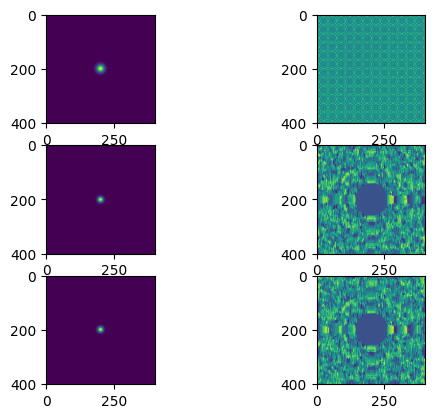

In [36]:
fig, ax = plt.subplots(3, 2)
ax[0, 0].imshow(np.abs(E))
ax[0, 1].imshow(np.angle(E))

ax[1, 0].imshow(np.abs(E_Fresnel))
ax[1, 1].imshow(np.angle(E_Fresnel))

ax[2, 0].imshow(np.abs(E_Fresnel2))
ax[2, 1].imshow(np.angle(E_Fresnel2))

plt.show()